## Анализ данных в индустрии. Проект 1

Задание: Постройте воронку, которая показывала бы в динамике по неделям и месяцам, сколько клиентов посещает наш сайт, и какая доля из них регистрируется на нем \ подает заявку на игру \ по факту приходит на нее. Количество клиентов и конверсии необходимо изобразить на одном графике.

In [1]:
import psycopg2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Создаем соединение с бд
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)

In [3]:
# SQL запрос для таблицы с разбивкой по неделям 

query_weeks = """with client as (select client_rk, visit_dttm from msu_analytics.client),
account as (select account_rk, client_rk, registration_dttm from msu_analytics.account),
game as (select game_rk, game_dttm, Game_flg from msu_analytics.game), 
t1 as (SELECT distinct client.client_rk, 
        TO_CHAR(client.visit_dttm, 'IYYY-IW') as data_visit,
        TO_CHAR(account.registration_dttm, 'IYYY-IW') as data_register, 
        TO_CHAR(app.application_dttm, 'IYYY-IW') as data_application,
        TO_CHAR(game.game_dttm, 'IYYY-IW') as data_game,
        game.game_flg
FROM client 
left join account using(client_rk)
left join msu_analytics.application as app using(account_rk)
left join game using(game_rk))

select data_visit, 
        count(client_rk) as count_visit,
        count(data_register) as count_register,
        count(data_application) as count_application, 
        count(data_game) filter (where game_flg = 1) as count_game
from t1 
group by data_visit"""


In [4]:
# SQL запрос для таблицы с разбивкой по месяцам 

query_months = """with client as (select client_rk, visit_dttm from msu_analytics.client),
account as (select account_rk, client_rk, registration_dttm from msu_analytics.account),
game as (select game_rk, game_dttm, Game_flg from msu_analytics.game), 
t1 as (SELECT distinct client.client_rk, 
        TO_CHAR(client.visit_dttm, 'MM-YYYY') as data_visit,
        TO_CHAR(account.registration_dttm, 'MM-YYYY') as data_register, 
        TO_CHAR(app.application_dttm, 'MM-YYYY') as data_application,
        TO_CHAR(game.game_dttm, 'MM-YYYY') as data_game,
        game.game_flg
FROM client 
left join account using(client_rk)
left join msu_analytics.application as app using(account_rk)
left join game using(game_rk))

select data_visit, 
        count(client_rk) as count_visit,
        count(data_register) as count_register,
        count(data_application) as count_application, 
        count(data_game) filter (where game_flg = 1) as count_game
from t1 
group by data_visit"""

In [5]:
# Создаем таблицы с разбивкой по месяцам и неделям 

df_by_weeks = pd.read_sql(query_weeks, conn)
df_by_month = pd.read_sql(query_months, conn)

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
conn.close() 

In [7]:
# Сортируем по столбцу data_visit

df_by_month = df_by_month.sort_values('data_visit')
df_by_weeks = df_by_weeks.sort_values('data_visit')

In [8]:
df_by_month

,data_visit,count_visit,count_register,count_application,count_game
5,01-2023,878,239,90,20
2,02-2023,32,8,0,0
3,09-2022,810,222,83,55
1,10-2022,879,253,101,68
0,11-2022,824,238,94,65
4,12-2022,831,222,83,33


In [9]:
df_by_weeks

,data_visit,count_visit,count_register,count_application,count_game
10,2022-35,119,40,15,8
18,2022-36,187,34,9,6
16,2022-37,178,54,27,11
22,2022-38,190,54,21,18
21,2022-39,212,76,34,26
8,2022-40,212,66,26,21
11,2022-41,197,51,20,17
15,2022-42,179,49,20,14
19,2022-43,201,60,27,11
2,2022-44,212,62,31,23


Данные за 02-2023 не полные, чтобы они не искажали отчет, удалим строку в датафрейме df_by_month с data_visit = 02-2023

In [10]:
# Удаляем строку с data_visit = 02-2023

df_by_month = df_by_month.drop(df_by_month[df_by_month['data_visit'] == '02-2023'].index).reset_index()

In [11]:
df_by_month

,index,data_visit,count_visit,count_register,count_application,count_game
0,5,01-2023,878,239,90,20
1,3,09-2022,810,222,83,55
2,1,10-2022,879,253,101,68
3,0,11-2022,824,238,94,65
4,4,12-2022,831,222,83,33


In [12]:
# Добавим значения конверсий по каждому этапу в таблицу df_by_month

df_by_month['conv_to_registr'] = (df_by_month['count_register'] / df_by_month['count_visit'] * 100).round(1)
df_by_month['conv_to_application'] = (
    (df_by_month['count_application'] / df_by_month['count_register'] * 100).round(1)
)
df_by_month['conv_to_game'] = (df_by_month['count_game'] / df_by_month['count_application'] * 100).round(1)

# Добавим значения конверсий по каждому этапу в таблицу df_by_weeks

df_by_weeks['conv_to_registr'] = (df_by_weeks['count_register'] / df_by_weeks['count_visit'] * 100).round(1)
df_by_weeks['conv_to_application'] = (
    (df_by_weeks['count_application'] / df_by_weeks['count_register'] * 100).round(1)
)
df_by_weeks['conv_to_game'] = (df_by_weeks['count_game'] / df_by_weeks['count_application'] * 100).round(1)


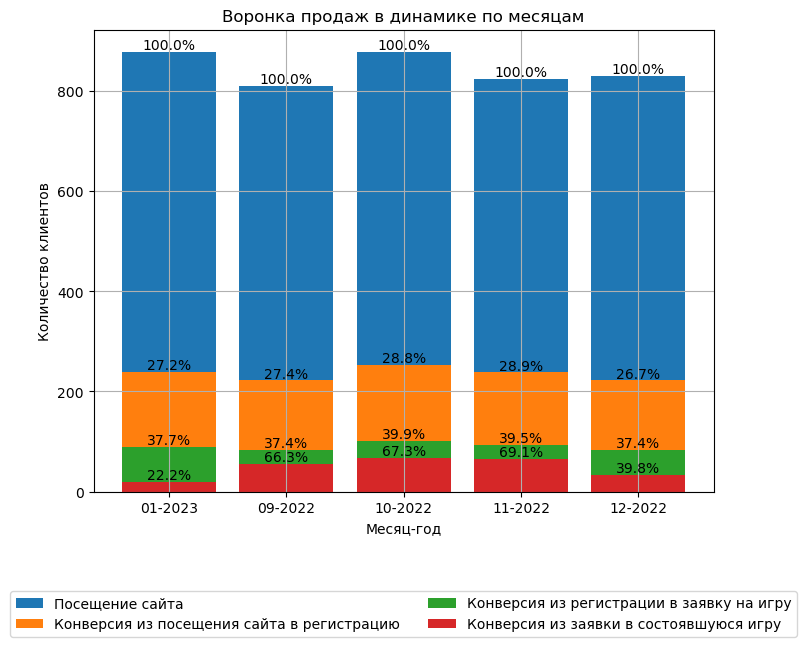

In [13]:
# Строим график для отображения воронки продаж в динамике по месяцам

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(df_by_month['data_visit'], df_by_month['count_visit'], label='Посещение сайта')
ax.bar(df_by_month['data_visit'], df_by_month['count_register'], label='Конверсия из посещения сайта в регистрацию')
ax.bar(df_by_month['data_visit'], df_by_month['count_application'], label='Конверсия из регистрации в заявку на игру')
ax.bar(df_by_month['data_visit'], df_by_month['count_game'], label='Конверсия из заявки в состоявшуюся игру')

for i, row in df_by_month.iterrows():
    ax.text(row['data_visit'], row['count_visit'] + 5, f"{100:.1f}%", ha='center')
    ax.text(row['data_visit'], row['count_register'] + 5, f"{row['conv_to_registr']:.1f}%", ha='center')
    ax.text(row['data_visit'], row['count_application'] + 5, f"{row['conv_to_application']:.1f}%", ha='center')
    ax.text(row['data_visit'], row['count_game'] + 5, f"{row['conv_to_game']:.1f}%", ha='center')

# добавляем заголовок, подписи осей и легенду
plt.title('Воронка продаж в динамике по месяцам')
plt.xlabel('Месяц-год')
plt.ylabel('Количество клиентов')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
ax.grid(True)

plt.show()

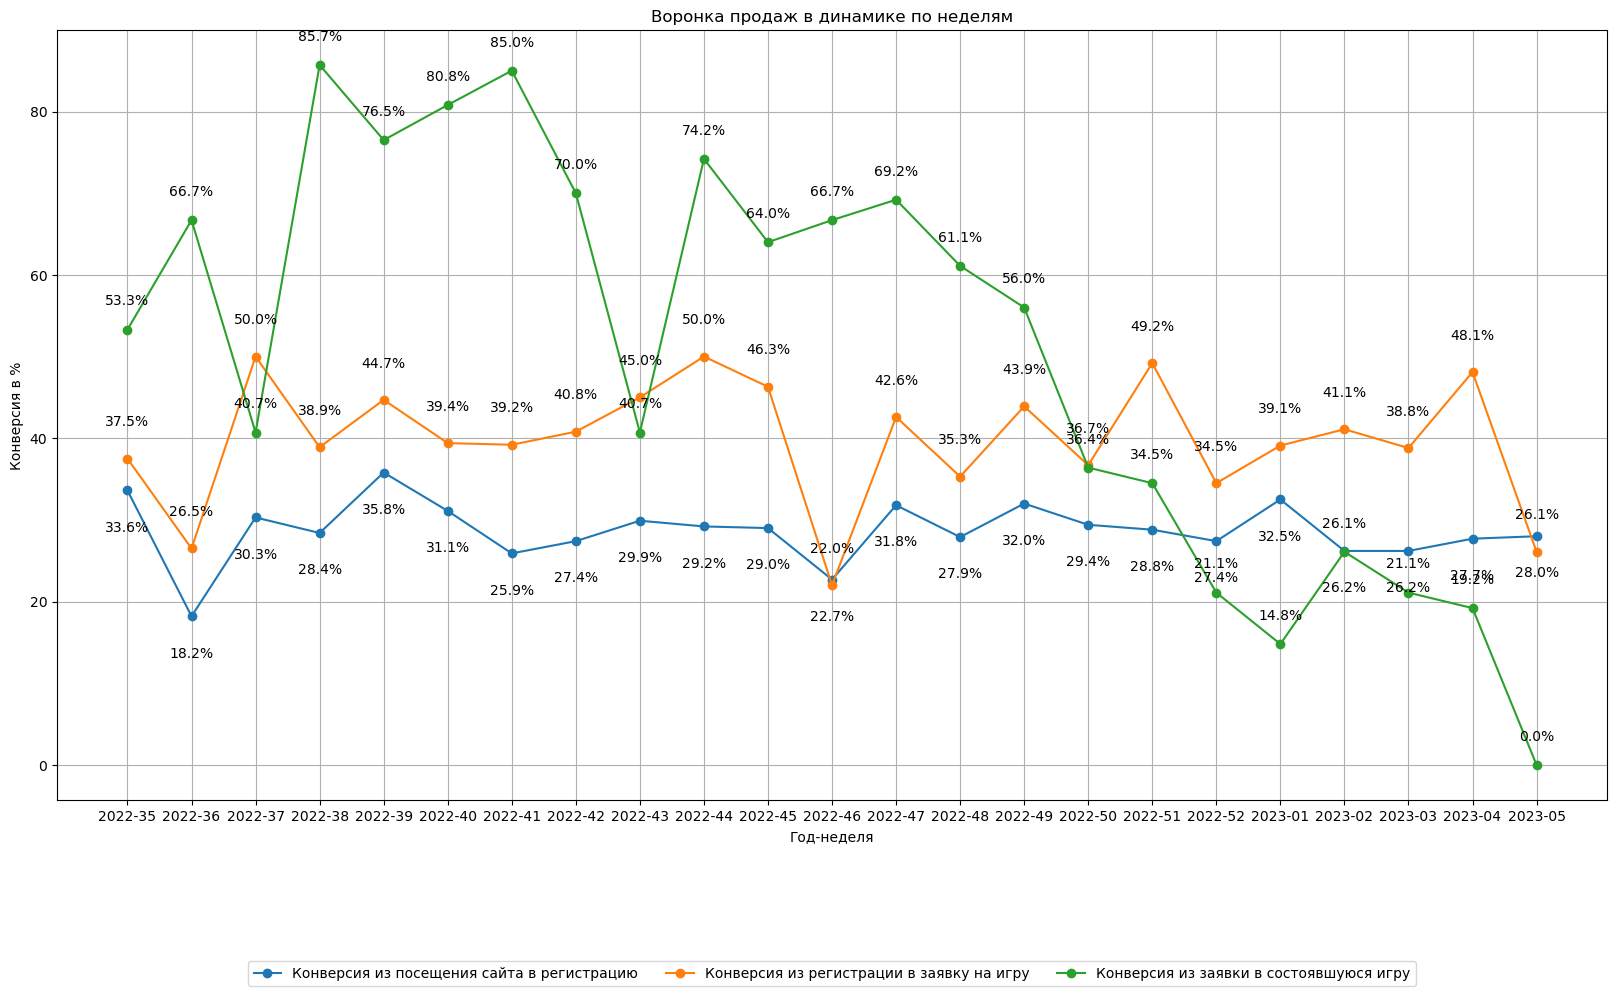

In [14]:
# Строим график для отображения воронки продаж в динамике по неделям

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df_by_weeks['data_visit'], df_by_weeks['conv_to_registr'], 'o-', label='Конверсия из посещения сайта в регистрацию')
ax.plot(df_by_weeks['data_visit'], df_by_weeks['conv_to_application'], 'o-', label='Конверсия из регистрации в заявку на игру')
ax.plot(df_by_weeks['data_visit'], df_by_weeks['conv_to_game'], 'o-', label='Конверсия из заявки в состоявшуюся игру')

for i, row in df_by_weeks.iterrows():
    ax.text(row['data_visit'], row['conv_to_registr'] - 5, f"{row['conv_to_registr']:.1f}%", ha='center')
    ax.text(row['data_visit'], row['conv_to_application'] + 4, f"{row['conv_to_application']:.1f}%", ha='center')
    ax.text(row['data_visit'], row['conv_to_game'] + 3, f"{row['conv_to_game']:.1f}%", ha='center')

# добавляем заголовок, подписи осей и легенду
plt.title('Воронка продаж в динамике по неделям')
plt.xlabel('Год-неделя')
plt.ylabel('Конверсия в %')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax.grid(True)

plt.show()


Данные за 2023-05 в рассчет брать не будем, так как неделя не полная.

**Вывод**

Конверсия из посещения сайта в регистрацию стабильна, она составляет примерно 20-30% в неделю и примерно 27-29% в месяц.
Конверсия из регистрации в заявку на игру также стабильна, она составляет примерно 27-49% в неделю и примерно 37-40% в месяц. Эти показатели не являются высокими.

С декабря 2022 года заметно резкое снижение конверсии из заявки в состоявшуюся игру - спад до 20%, до этого она практически всегда держалась на уровне выше 60%. В декабре 2022 и январе 2023 конверсия из регистрации в заявку держалась на уровне 35-48%, но при этом качество заявок снизилось - только 14-27% от всех заявок закончилось посещением игры. Можно сделать вывод о проблеме, по какой-то причине люди стали сильно меньше приходить на игры. Возможно, это связано с низкой мотивацией игроков или техническими проблемами.

**Возможные точки роста продукта:**
1. Оптимизация процесса регистрации и улучшение пользовательского опыта на странице заявки на игру, чтобы увеличить конверсию на этом этапе. Наибольшее количество потенциальных клиентов теряется на этапе регистрации, что может быть связано с сложностью процесса или неудобством формы регистрации.
2. Снижение оттока пользователей после регистрации и увеличение конверсии из регистрации в заявку на игру.
3. Увеличение конверсии из заявки в состоявшуюся игру. Для этого можно провести анализ причин спада конверсии после недели 44 и попробовать устранить их. Возможно, это связано с низкой мотивацией игроков или техническими проблемами.
4. Исследование и улучшение игрового опыта, чтобы повысить мотивацию пользователей для повторной игры. 
5. Использование персонализации и рекомендательных систем, чтобы увеличить вовлеченность пользователей и повысить конверсию в повторную игру.